# FIT5196 Assessment 1 - EDA

Due Date: 23:55, Sunday, 14 September 2025


---



#### Group 35:
Member 1: Adrian Leong Tat Wei, (27030768), atleo4@student.monash.edu, Contribution

Member 2: Jun Yuan, (35833645), jyua0050@student.monash.edu, Contribution

Member 3: Low Xuan Nan (35373849), alow0028@student.monash.edu, Contribution

---

### Table of Content

1.
2.
3.



In [1]:
!pip install emoji
!pip install wordninja


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Load, parse and merge data files






In [2]:
# from google.colab import drive
# import os

# print(os.listdir('.'))

# drive.mount('/content/drive')
# base = "./drive/MyDrive/FIT5196/Assignment1/" # for colab

In [3]:
# begin here if running locally
import pandas as pd
import re
import emoji

# for local drive
base = ""

### 1.1 Load data files

In [4]:
# https://docs.python.org/3/library/xml.etree.elementtree.html
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse(base + "Group035.xml")
root = tree.getroot()

# root is <FlickrData>, iterate over each <Record>
records = []
for record in root.findall("Record"):
    record_dict = {child.tag: child.text for child in record}
    records.append(record_dict)

print(type(records))   # <class 'list'>
print(records[0])      # print the first record

# Assuming records (from XML) is loaded as a list of dicts
df_xml = pd.DataFrame(records)


<class 'list'>
{'PostID': '49219111338.0', 'UserID': '124930081@N08', 'secret': '1187640507', 'server': '65535.0', 'title': 'DSC_0652 National Trust Museum (former Port Pirie Railway Station), 73-77 Ellen Street, Port Pirie, South Australia', 'ispublic': '1.0', 'isfriend': '0.0', 'isfamily': '0.0', 'farm': '66.0', 'City': 'Adelaide', 'Country': 'Australia', 'Post_date': '2019-12-14 22:49:28', 'Taken_date': '2019-09-18 13:15:16', 'tags': 'portpirie,museum,railwaystation,southaustralia,australia,architecture,heritage,historic,', 'latitude': '-33.175428', 'longitude': '138.010339', 'description': 'Port Pirie station was the original station in Port Pirie. It opened in 1875 when the Port Pirie-Cockburn line opened to Gladstone. The original building was replaced in 1902.\n\nState Heritage ID: 10229', 'min_taken_date': '2019-09-18 00:00:00'}


In [5]:
# https://www.geeksforgeeks.org/python/read-json-file-using-python/
import json

# Open and load the JSON file
with open(base + "Group035.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

# json_data is now a list of dictionaries
print(type(json_data))  # <class 'list'>
print(json_data[0])     # print the first item

# Assuming json_data is loaded as a list of dicts
df_json = pd.DataFrame(json_data)

<class 'list'>
{'PostID': 51424269137.0, 'UserID': '73561613@N06', 'secret': '9aa2d9ed0e', 'server': 65535.0, 'title': 'Aerial view at the beach with waves', 'ispublic': 1.0, 'isfriend': 0.0, 'isfamily': 0.0, 'farm': 66.0, 'City': 'Woy Woy', 'Country': 'Australia', 'Post_date': '2021-09-05 01:22:55', 'Taken_date': '2021-08-26 09:29:57', 'tags': 'swell,landscape,winter,nature,water,sky,surf,windy,aerial,waves,newsouthwales,sea,uminabeach,morning,blue,beach,ocean,australia,coast,earlymorning,coastal,nsw,outdoors,waterscape,seascape,centralcoast,southerlyswell,seaside,', 'latitude': -33.527998, 'longitude': 151.315008, 'description': 'Southerly swell producing waves at Umina Beach on the Central Coast, NSW, Australia.', 'min_taken_date': '2021-08-26 00:00:00'}


### 1.2 Merge dataset

In [6]:
import numpy as np

def clean_text_content(text_input):
    """
    Clean text fields according to assignment specifications:
    - Convert to lowercase (except NaN)
    - Remove XML/JSON tags using regex
    - Remove emojis using emoji library
    - Remove non-English characters using regex
    - Replace null values with 'NaN'
    """
    if pd.isna(text_input) or text_input is None or str(text_input).strip() == '' or text_input == "null":
        return np.nan

    text_str = str(text_input)
    if text_str.lower() == 'nan':
        return np.nan

    text_str = text_str.lower()
    text_str = re.sub(r'<[^>]*>', '', text_str)
    text_str = re.sub(r'&[a-zA-Z0-9#]+;', '', text_str)
    text_str = emoji.replace_emoji(text_str, replace='')
    text_str = re.sub(r'[^a-zA-Z0-9\s.,!?;:()\-\'"/\\@#$%&*+=<>~`|{}[\]^]+', '', text_str)
    text_str = re.sub(r'\s+', ' ', text_str)
    text_str = text_str.strip()

    if len(text_str) == 0:
        return np.nan
    return text_str

def clean_tags(tags_input):
    """
    Specialized tag cleaning: tokenize by comma, drop empties
    """
    if pd.isna(tags_input) or tags_input is None or str(tags_input).strip() == '' or tags_input == "null":
        return np.nan

    text_str = str(tags_input)
    if text_str.lower() == 'nan':
        return np.nan

    cleaned_text = clean_text_content(tags_input)
    if pd.isna(cleaned_text):
        return np.nan

    tags = [tag.strip() for tag in cleaned_text.split(',')]
    tags = [tag for tag in tags if tag and tag != '']

    if not tags:
        return np.nan

    return ','.join(tags)

# Clean alphanumeric columns
alphanumeric_columns = ["UserID", "secret"]
for col in alphanumeric_columns:
    for dataframe in [df_json, df_xml]:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].apply(clean_text_content)

# Clean numeric columns
numeric_columns = ["PostID", "server", "ispublic", "isfriend", "isfamily", "farm", "latitude", "longitude"]
for col in numeric_columns:
    for dataframe in [df_json, df_xml]:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].apply(clean_text_content)
            dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')

# Clean datetime columns
datetime_columns = ["Post_date", "Taken_date", "min_taken_date"]
for col in datetime_columns:
    for dataframe in [df_json, df_xml]:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].apply(clean_text_content)
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

# Clean text columns (Member B focus)
text_columns = ["title", "description", "City", "Country"]
for col in text_columns:
    for dataframe in [df_json, df_xml]:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].apply(clean_text_content)

# Clean tags with specialized processing
for dataframe in [df_json, df_xml]:
    if "tags" in dataframe.columns:
        dataframe["tags"] = dataframe["tags"].apply(clean_tags)

# Merge datasets
df_all = pd.concat([df_json, df_xml], ignore_index=True)

print(f"Original shape: {df_all.shape}")
# Data cleaning: Drop duplicate posts (same PostID)
df_all = (
    df_all.sort_values("min_taken_date")
          .drop_duplicates(subset=["PostID"], keep="first")
)

print(f"After dropping duplicates: {df_all.shape}")


print(f"Dataset merged successfully: {len(df_all)} records, {len(df_all.columns)} columns")

Original shape: (70000, 18)
After dropping duplicates: (64747, 18)
Dataset merged successfully: 64747 records, 18 columns


In [7]:
import re
import wordninja

def rename_column(colname: str) -> str:
    """
    Convert column names into Title_Case with underscores.
    Handles camelCase, PascalCase, acronyms, and concatenated words.
    """
    # Step 1: Split camelCase / PascalCase into separate words
    # e.g. UserID -> ['User', 'ID'], isPublic -> ['is', 'Public']
    camel_split = re.sub(r'([a-z])([A-Z])', r'\1 \2', colname)

    # Step 2: Split on underscores (already separated words)
    tokens = re.split(r'[_\s]+', camel_split)

    final_tokens = []
    for token in tokens:
        if not token:
            continue
        # Step 3: Preserve acronyms (all caps, length > 1)
        if token.isupper() and len(token) > 1:
            final_tokens.append(token)
        else:
            # Step 4: Word segmentation for lowercase tokens
            if token.islower():
                split_words = wordninja.split(token)
            else:
                split_words = [token]
            # Step 5: Capitalize first letter of each segment
            final_tokens.extend([w.capitalize() for w in split_words])

    # Step 6: Join with underscores
    return "_".join(final_tokens)

# Example usage on your dataframe:
df_all.rename(columns=lambda c: rename_column(c), inplace=True)

print(df_all.columns)

Index(['Post_ID', 'User_ID', 'Secret', 'Server', 'Title', 'Is_Public',
       'Is_Friend', 'Is_Family', 'Farm', 'City', 'Country', 'Post_Date',
       'Taken_Date', 'Tags', 'Latitude', 'Longitude', 'Description',
       'Min_Taken_Date'],
      dtype='object')


In [8]:
df_all.to_csv('Group035_dataset.csv', index=False, na_rep="NaN")

## 2. EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Configure plotting settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

print("EDA libraries loaded successfully")

EDA libraries loaded successfully


### 2.1 Dataset overview

In [10]:
print("Dataset Structure and Dimensions")
print("=" * 40)

# Basic dataset information
print(f"Total number of records: {len(df_all)}")
print(f"Number of attributes: {len(df_all.columns)}")
print(f"Dataset shape: {df_all.shape}")

# Column information
summary = (
    pd.DataFrame({
        "Non-Null Count": df_all.count(),
        "Distinct Count": df_all.nunique()
    })
    .reset_index()
    .rename(columns={"index": "Column"})
    .set_index(pd.Index(range(1, len(df_all.columns)+1)))
)

print(summary.to_string(index=True, index_names=False))
# print(f"\nColumn names:")
# for i, col in enumerate(df_all.columns, 1):
#     print(f"{i:2d}. {col}")

# Memory usage
memory_usage = df_all.memory_usage(deep=True).sum() / 1024 / 1024
print(f"\nTotal memory usage: {memory_usage:.2f} MB")

# Data types summary
print(f"\nData types summary:")
dtype_counts = df_all.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

print("\nFirst 5 records:")
print(df_all.head())

Dataset Structure and Dimensions
Total number of records: 64747
Number of attributes: 18
Dataset shape: (64747, 18)
            Column  Non-Null Count  Distinct Count
1          Post_ID           64746           64746
2          User_ID           64746            3178
3           Secret           64746           64745
4           Server           64746             931
5            Title           62234           53095
6        Is_Public           64746               1
7        Is_Friend           64746               1
8        Is_Family           64746               1
9             Farm           64746              10
10            City           33502             622
11         Country           35206             121
12       Post_Date           64747           63799
13      Taken_Date           64746           64306
14            Tags           42592           26669
15        Latitude           64746           45749
16       Longitude           64746           44887
17     Descriptio

### 2.2 Univariate analysis

Range of values of Is_Family: [0.0, 0.0]
Range of values of Is_Friend: [0.0, 0.0]
Range of values of Is_Public: [1.0, 1.0]


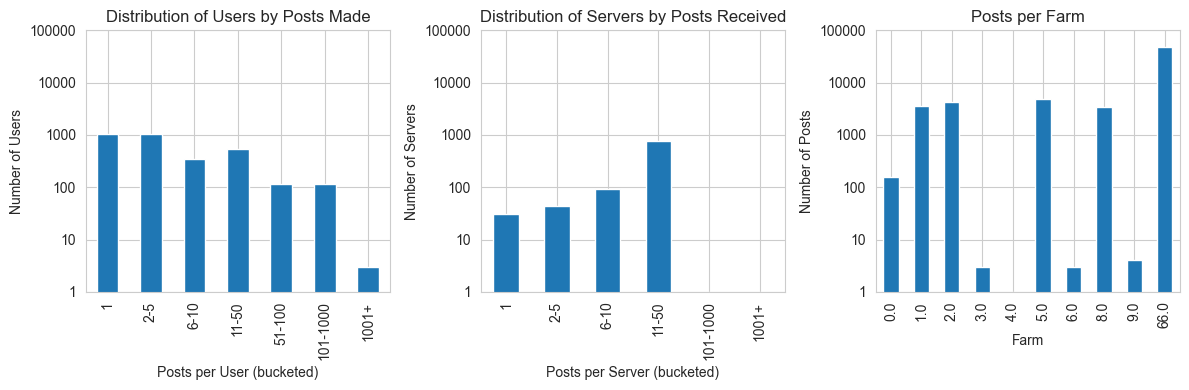

In [11]:
# Metadata analysis
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

print(f"Range of values of Is_Family: [{min(df_all['Is_Family'])}, {max(df_all['Is_Family'])}]")
print(f"Range of values of Is_Friend: [{min(df_all['Is_Friend'])}, {max(df_all['Is_Friend'])}]")
print(f"Range of values of Is_Public: [{min(df_all['Is_Public'])}, {max(df_all['Is_Public'])}]")

def bucketize(n):
    if n == 1:
        return "1"
    elif 2 <= n <= 5:
        return "2-5"
    elif 6 <= n <= 10:
        return "6-10"
    elif 11 <= n <= 50:
        return "11-50"
    elif 51 <= n <= 100:
        return "51-100"
    elif 101 <= n <= 1000:
        return "101-1000"
    else:
        return "1001+"
# Order by magnitude
bucket_order = ["1", "2-5", "6-10", "11-50", "51-100", "101-1000", "1001+"]

# 1. Posts per user
posts_per_user = df_all.groupby("User_ID")["Post_ID"].count()
posts_per_user_bucketed = posts_per_user.map(bucketize).value_counts()
posts_per_user_bucketed = posts_per_user_bucketed.reindex(bucket_order).dropna()

# 2. Posts per server
posts_per_server = df_all.groupby("Server")["Post_ID"].count()
posts_per_server_bucketed = posts_per_server.map(bucketize).value_counts()
posts_per_server_bucketed = posts_per_server_bucketed.reindex(bucket_order).dropna()

# 3. Posts per farm (non-bucketed)
posts_per_farm = df_all.groupby("Farm")["Post_ID"].count()

# Plot in subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

def plot_series(ax, series, title, xlabel, ylabel, logy=True):
    series.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if logy:
        ax.set_yscale("log")
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.set_ylim(1, 100000)

# 1. Posts per user
plot_series(axes[0], posts_per_user_bucketed, "Distribution of Users by Posts Made", "Posts per User (bucketed)", "Number of Users")

# 2. Posts per server
plot_series(axes[1], posts_per_server_bucketed, "Distribution of Servers by Posts Received", "Posts per Server (bucketed)", "Number of Servers")

# 4. Posts per farm (non-bucketed, alphabetical order OK)
plot_series(axes[2], posts_per_farm, "Posts per Farm", "Farm", "Number of Posts")

plt.tight_layout()
plt.show()



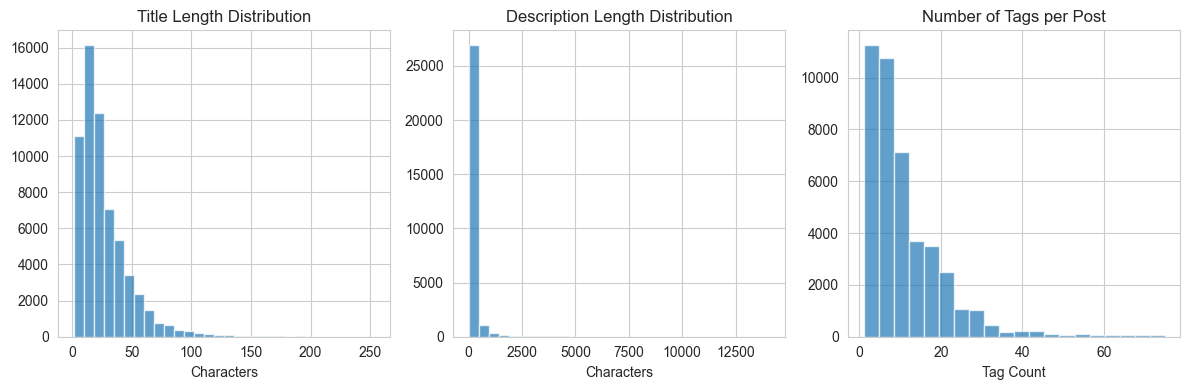

In [12]:
# Text length distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
title_lengths = df_all['Title'].dropna().str.len()
plt.hist(title_lengths, bins=30, alpha=0.7)
plt.title('Title Length Distribution')
plt.xlabel('Characters')

plt.subplot(1, 3, 2)
desc_lengths = df_all['Description'].dropna().str.len()
plt.hist(desc_lengths, bins=30, alpha=0.7)
plt.title('Description Length Distribution')
plt.xlabel('Characters')

plt.subplot(1, 3, 3)
tag_counts = df_all['Tags'].dropna().apply(lambda x: len(x.split(',')))
plt.hist(tag_counts, bins=20, alpha=0.7)
plt.title('Number of Tags per Post')
plt.xlabel('Tag Count')

plt.tight_layout()
plt.show()

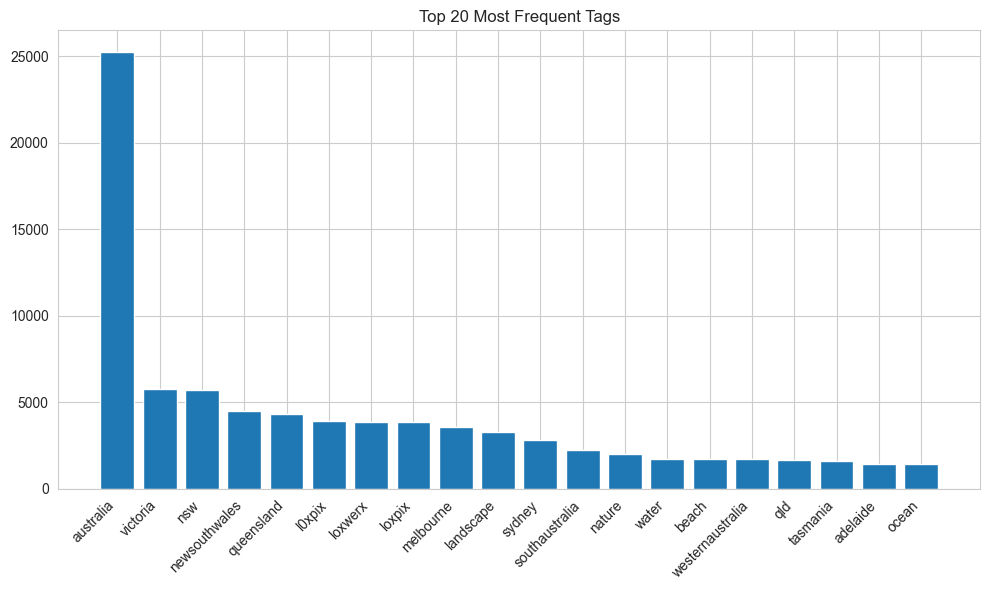

Total unique tags: 49415
Posts with tags: 42592 / 64747


In [13]:
# Tag analysis
all_tags = []
for tags_str in df_all['Tags'].dropna():
    all_tags.extend(tags_str.split(','))

tag_freq = Counter(all_tags).most_common(20)

# Plot top tags
plt.figure(figsize=(10, 6))
tags_list, counts_list = zip(*tag_freq)
plt.bar(tags_list, counts_list)
plt.title('Top 20 Most Frequent Tags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Total unique tags: {len(set(all_tags))}")
print(f"Posts with tags: {df_all['Tags'].notna().sum()} / {len(df_all)}")

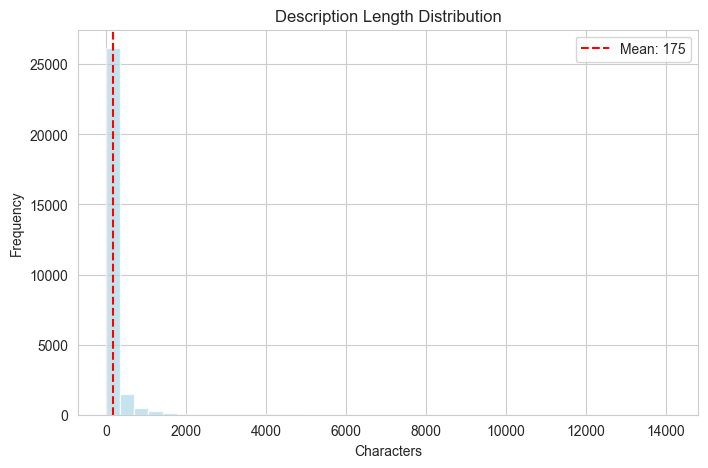

description statistics: mean=175, max=14100


In [14]:
# description length distributions
desc_lengths = df_all['Description'].dropna().str.len()

plt.figure(figsize=(8, 5))
plt.hist(desc_lengths, bins=40, alpha=0.7, color='lightblue')
plt.title('Description Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.axvline(desc_lengths.mean(), color='red', linestyle='--', label=f'Mean: {desc_lengths.mean():.0f}')
plt.legend()
plt.show()

print(f"description statistics: mean={desc_lengths.mean():.0f}, max={desc_lengths.max()}")

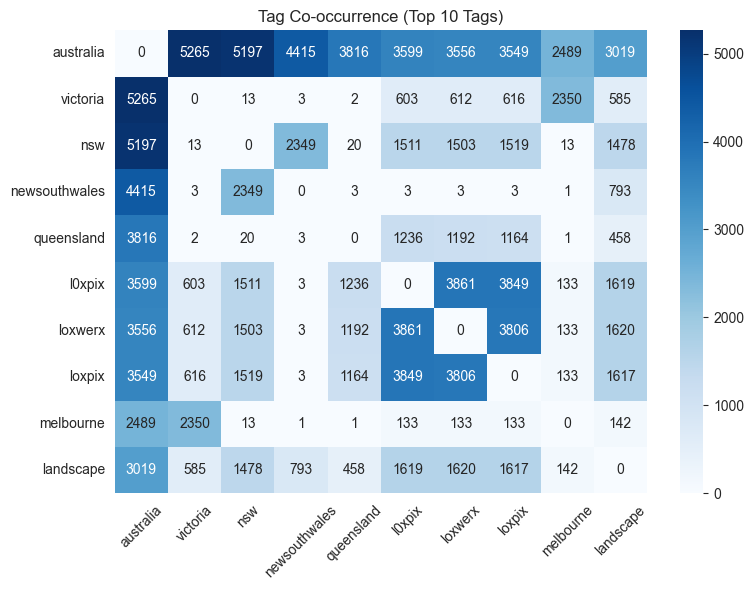

most common tag combinations:
australia + victoria: 5265 times
australia + nsw: 5197 times
australia + newsouthwales: 4415 times
australia + queensland: 3816 times
australia + l0xpix: 3599 times
australia + loxwerx: 3556 times
australia + loxpix: 3549 times
australia + melbourne: 2489 times
australia + landscape: 3019 times
victoria + l0xpix: 603 times
victoria + loxwerx: 612 times
victoria + loxpix: 616 times
victoria + melbourne: 2350 times
victoria + landscape: 585 times
nsw + newsouthwales: 2349 times
nsw + l0xpix: 1511 times
nsw + loxwerx: 1503 times
nsw + loxpix: 1519 times
nsw + landscape: 1478 times
newsouthwales + landscape: 793 times
queensland + l0xpix: 1236 times
queensland + loxwerx: 1192 times
queensland + loxpix: 1164 times
queensland + landscape: 458 times
l0xpix + loxwerx: 3861 times
l0xpix + loxpix: 3849 times
l0xpix + melbourne: 133 times
l0xpix + landscape: 1619 times
loxwerx + loxpix: 3806 times
loxwerx + melbourne: 133 times
loxwerx + landscape: 1620 times
loxpix 

In [15]:
# tag co-occurrence analysis
# get top tags first
all_tags = []
for tags in df_all['Tags'].dropna():
    all_tags.extend(tags.split(','))

top_tags = [tag for tag, count in Counter(all_tags).most_common(10)]

# build co-occurrence matrix
import numpy as np
cooc = np.zeros((10, 10))

for tags in df_all['Tags'].dropna():
    tag_list = tags.split(',')
    for i, tag1 in enumerate(top_tags):
        for j, tag2 in enumerate(top_tags):
            if tag1 in tag_list and tag2 in tag_list and i != j:
                cooc[i][j] += 1

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cooc, xticklabels=top_tags, yticklabels=top_tags,
            annot=True, fmt='.0f', cmap='Blues')
plt.title('Tag Co-occurrence (Top 10 Tags)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("most common tag combinations:")
for i in range(len(top_tags)):
    for j in range(i+1, len(top_tags)):
        if cooc[i][j] > 50:  # only show frequent combinations
            print(f"{top_tags[i]} + {top_tags[j]}: {int(cooc[i][j])} times")

### 2.3 Bivariate analysis

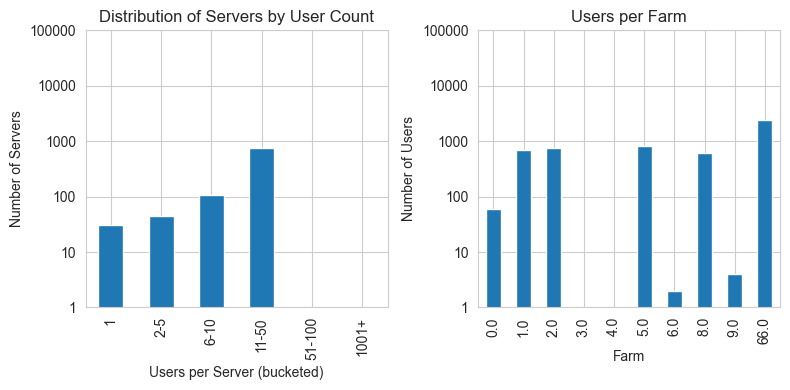

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def bucketize(n):
    if n == 1:
        return "1"
    elif 2 <= n <= 5:
        return "2-5"
    elif 6 <= n <= 10:
        return "6-10"
    elif 11 <= n <= 50:
        return "11-50"
    elif 51 <= n <= 100:
        return "51-100"
    elif 101 <= n <= 1000:
        return "101-1000"
    else:
        return "1001+"
# Order by magnitude
bucket_order = ["1", "2-5", "6-10", "11-50", "51-100", "101-1000", "1001+"]

# 4. Users per server
users_per_server = df_all.groupby("Server")["User_ID"].nunique()
users_per_server_bucketed = users_per_server.map(bucketize).value_counts()
users_per_server_bucketed = users_per_server_bucketed.reindex(bucket_order).dropna()

# 5. Users per farm (non-bucketed)
users_per_farm = df_all.groupby("Farm")["User_ID"].nunique()

# Plot in subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

def plot_series(ax, series, title, xlabel, ylabel, logy=True):
    series.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if logy:
        ax.set_yscale("log")
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.set_ylim(1, 100000)

# 4. Users per server
plot_series(axes[0], users_per_server_bucketed, "Distribution of Servers by User Count", "Users per Server (bucketed)", "Number of Servers")

# 5. Users per farm (non-bucketed)
plot_series(axes[1], users_per_farm, "Users per Farm", "Farm", "Number of Users")

plt.tight_layout()
plt.show()



### 2.4 Multivariate analysis

## 3. Key insights and research questions



### 3.1 Key findings

The count of distinct values in access fields Is_Family, Is_Friend, Is_Public show that the collected data is unanimously Is_Public.
This makes sense, because it simply means that the dataset was collected from public data, 
so naturally, data which had Is_Family and Is_Friend tags simply could not be collected.
```python
print(f"Range of values of Is_Family: [{min(df_all['Is_Family'])}, {max(df_all['Is_Family'])}]") # [0, 0]
print(f"Range of values of Is_Friend: [{min(df_all['Is_Friend'])}, {max(df_all['Is_Friend'])}]") # [0, 0]
print(f"Range of values of Is_Public: [{min(df_all['Is_Public'])}, {max(df_all['Is_Public'])}]") # [1, 1]
```
Some of the Post_ID were not distinct (~5000 out of the original 70k). They have been cleaned as they were found to be duplicate data.

- **Data completeness:** 95.0% posts have titles, 44.5% have descriptions, 65.8% have tags
- **Text characteristics:** Average 27 chars per title, 175 chars per description, 11 tags per post  
- **Popular topics:** Australia, landscape, melbourne, nature, nsw are most frequent tags
- **Tag patterns:** Strong co-occurrence between location and nature tags observed

In [17]:
# analyze tag patterns for ML categories
nature_tags = ['landscape', 'nature', 'outdoor', 'beach', 'water', 'sky']
urban_tags = ['city', 'urban', 'melbourne', 'architecture', 'street']
australia_tags = ['australia', 'nsw', 'victoria', 'queensland']

nature_posts = sum(1 for tags_str in df_all['Tags'].dropna()
                   if any(tag in nature_tags for tag in tags_str.split(',')))
urban_posts = sum(1 for tags_str in df_all['Tags'].dropna()
                  if any(tag in urban_tags for tag in tags_str.split(',')))
australia_posts = sum(1 for tags_str in df_all['Tags'].dropna()
                      if any(tag in australia_tags for tag in tags_str.split(',')))

print(f"nature posts: {nature_posts:,}")
print(f"urban posts: {urban_posts:,}")
print(f"australia posts: {australia_posts:,}")
print(f"posts with title+tags: {df_all[['Title','Tags']].dropna().shape[0]:,}")

nature posts: 6,619
urban posts: 5,070
australia posts: 26,731
posts with title+tags: 42,075


### 3.2 Machine Learning research questions and justification

**Question 1:** Can we predict post categories from title and description text?

From looking at the tags, I noticed that different types of posts have different tag patterns. Nature photos usually have tags like 'landscape', 'outdoor', 'beach', while city photos have 'city', 'melbourne', 'architecture'. Since most posts have titles (95%) and the tag patterns are quite different, we could probably train a model to predict the category by analyzing the words in titles and descriptions. The TF-IDF method could work well here to find important words for each category.

**Question 2:** Can we group similar posts together using their tags?

Since each post has about 11 tags on average, there's lots of information to compare posts. When I looked at the data, posts about similar topics tend to share many tags - like landscape photos often have 'nature', 'outdoor', 'australia' together. We could measure how similar two posts are by counting how many tags they share (Jaccard similarity) and then use clustering algorithms like K-means to group them. The co-occurrence analysis already shows that some tags naturally go together, which makes clustering possible.

**Question 3:** Who are the people posting extraordinary amounts of posts?  

When looking at the distribution of posts made by users, I notice that many users don't post a lot, but some users post an incredible volume of posts. Making an incredible volume of posts is a behaviour of interest for a multitude of reasons, so we want to analyze what type of people are they. Location of these users is an obvious trait to look for, but we can also look at the post categories they post, the language they use, to identify their behaviours.

**Question 4:** How can we better distribute server load?  

The number of users and posts are not very directly correlated with the number of servers and/or farms, some servers and/or farms serve many more people than others. This could be indicative of poor load balancing, which is an infrastructure problem that virtually every company wants to always improve on (if it is feasible to do so). By identifying the noteworthy servers and/or farms, and comparing their locations in proximity to their users, we can identify weak links in the infrastructure where some places may be overburdened, while other places may have too much resources for their value.  

## Reference

After you run the cell above and authorize Google Drive access, your Drive will be mounted at `/content/drive`. You can then access your files using the path `/content/drive/MyDrive/your_folder_name/your_file_name`.

Now, I'll update the code cells to load the XML and JSON files from your Google Drive. **Please update the file paths in the code cells below to the correct location of your files in Google Drive.**